**STEP 1**: The installation, importation and upgrade of all needed libraries

In [30]:
!pip install yfinance pandas numpy matplotlib

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**STEP 2**: The creation of a data collection pipeline using the Yahoo Finance API. The ticker, start date and end date are editable based on your preference.

In [31]:
ticker = "NVDA"
start_date = "2020-01-01"
end_date = "2024-11-22"

data = yf.download(ticker, start=start_date, end=end_date)
print(data)

[*********************100%***********************]  1 of 1 completed

Price                       Adj Close       Close        High         Low  \
Ticker                           NVDA        NVDA        NVDA        NVDA   
Date                                                                        
2020-01-02 00:00:00+00:00    5.973122    5.997750    5.997750    5.918000   
2020-01-03 00:00:00+00:00    5.877517    5.901750    5.945750    5.852500   
2020-01-06 00:00:00+00:00    5.902164    5.926500    5.931750    5.781750   
2020-01-07 00:00:00+00:00    5.973620    5.998250    6.044250    5.909750   
2020-01-08 00:00:00+00:00    5.984825    6.009500    6.051000    5.953750   
...                               ...         ...         ...         ...   
2024-11-15 00:00:00+00:00  141.979996  141.979996  145.240005  140.080002   
2024-11-18 00:00:00+00:00  140.149994  140.149994  141.550003  137.149994   
2024-11-19 00:00:00+00:00  147.009995  147.009995  147.130005  140.990005   
2024-11-20 00:00:00+00:00  145.889999  145.889999  147.559998  142.729996   

**STEP 3**: For this exercise, some columns need to be dropped because this Simple Moving Average (SMA) viewer is only concerned with date and closing price.

In [32]:
data = data.drop(columns=['Adj Close', 'High','Low','Open','Volume'])
print(data)

Price                           Close
Ticker                           NVDA
Date                                 
2020-01-02 00:00:00+00:00    5.997750
2020-01-03 00:00:00+00:00    5.901750
2020-01-06 00:00:00+00:00    5.926500
2020-01-07 00:00:00+00:00    5.998250
2020-01-08 00:00:00+00:00    6.009500
...                               ...
2024-11-15 00:00:00+00:00  141.979996
2024-11-18 00:00:00+00:00  140.149994
2024-11-19 00:00:00+00:00  147.009995
2024-11-20 00:00:00+00:00  145.889999
2024-11-21 00:00:00+00:00  146.669998

[1232 rows x 1 columns]


**STEP 4**: The conversion of the data into a dataframe. This is necessary for data preprocessing for many reasons. One being its importance in handling diverse data (float, integer, strings etc). It is a flexibe structure for this purpose. Also, it is also needed in handling missing data.

In [33]:
df = pd.DataFrame(data)
print(df)

Price                           Close
Ticker                           NVDA
Date                                 
2020-01-02 00:00:00+00:00    5.997750
2020-01-03 00:00:00+00:00    5.901750
2020-01-06 00:00:00+00:00    5.926500
2020-01-07 00:00:00+00:00    5.998250
2020-01-08 00:00:00+00:00    6.009500
...                               ...
2024-11-15 00:00:00+00:00  141.979996
2024-11-18 00:00:00+00:00  140.149994
2024-11-19 00:00:00+00:00  147.009995
2024-11-20 00:00:00+00:00  145.889999
2024-11-21 00:00:00+00:00  146.669998

[1232 rows x 1 columns]


**STEP 5**: Construction of the SMA column using a window size of 5 which can be adjusted based on preference.

In [34]:
window_size = 5
df['SMA'] = df['Close'].rolling(window=window_size).mean()
print(df)

Price                           Close         SMA
Ticker                           NVDA            
Date                                             
2020-01-02 00:00:00+00:00    5.997750         NaN
2020-01-03 00:00:00+00:00    5.901750         NaN
2020-01-06 00:00:00+00:00    5.926500         NaN
2020-01-07 00:00:00+00:00    5.998250         NaN
2020-01-08 00:00:00+00:00    6.009500    5.966750
...                               ...         ...
2024-11-15 00:00:00+00:00  141.979996  145.711996
2024-11-18 00:00:00+00:00  140.149994  144.689996
2024-11-19 00:00:00+00:00  147.009995  144.433997
2024-11-20 00:00:00+00:00  145.889999  144.357996
2024-11-21 00:00:00+00:00  146.669998  144.339996

[1232 rows x 2 columns]


**STEP 6**: Plotting the graph of the Simple Moving Average

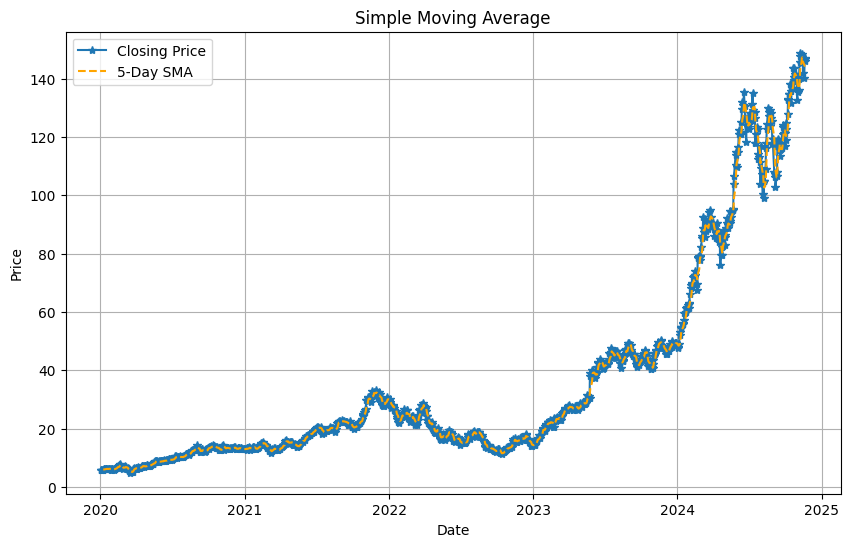

In [35]:
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Close'], label='Closing Price', marker='*')
plt.plot(df.index, df['SMA'], label=f'{window_size}-Day SMA', linestyle='--', color='orange')
plt.title('Simple Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()